# Using colormaps


The first part of this notebook is adapted from the Ipandas cookbook (`14.4. Computing connected components in an image`).

In [182]:
import itertools
import numpy as np
import networkx as nx
import matplotlib.colors as col
import matplotlib.pyplot as plt

def show_image(img, ax=None, **kwargs):
    ax.imshow(img, origin='lower',
              interpolation='none',
              **kwargs)
    ax.set_axis_off()

def show_graph(g, ax=None, node_color=None, edge_color='w', with_labels=False,
               node_size=25, **kwargs):
    # Layout the nodes in g in a rectangular array.
    pos = {(i, j): (j, i) for (i, j) in g.nodes()}
    if node_color is None:
        node_color = [img[i, j] for (i, j) in g.nodes()]
    nx.draw_networkx(g,
                     ax=ax,
                     pos=pos,
                     node_color=node_color,
                     linewidths=3,
                     width=2,
                     edge_color=edge_color,
                     with_labels=with_labels,
                     node_size=node_size,
                     **kwargs)

In [296]:
n = 10
np.random.seed(47)
img = np.random.randint(size=(n, n),
                        low=0, high=3)

Array `img` is an n x n  array with vals ranging from 0 to 2 inclusive.

In [184]:
img

array([[2, 0, 0, 0, 0, 1, 1, 2, 2, 2],
       [1, 0, 0, 1, 2, 1, 1, 1, 0, 1],
       [0, 2, 0, 2, 2, 1, 0, 0, 1, 1],
       [1, 2, 2, 1, 1, 1, 2, 1, 2, 0],
       [1, 1, 0, 1, 2, 0, 0, 2, 1, 2],
       [0, 0, 0, 2, 2, 0, 1, 2, 0, 1],
       [0, 0, 0, 0, 1, 2, 0, 2, 2, 2],
       [1, 1, 2, 2, 1, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 2]])

The graph `g` created in the next cell is called a 2D graph.  

It is an undirected graph with
n x n nodes; node names are pairs $(i,\,j)$. Node $(i,\,j)$ should 
thought of as the node at row $i$ and column $j$. Node $(i,\,j)$  is connected to
the next node in column $j$,
($(i+1,\,j)\,$ if $i+1 < n$), and to the next node 
in row $i$ ($(i,\,j+1)$ if $j+1  < n$).

In [185]:
g = nx.grid_2d_graph(n, n)

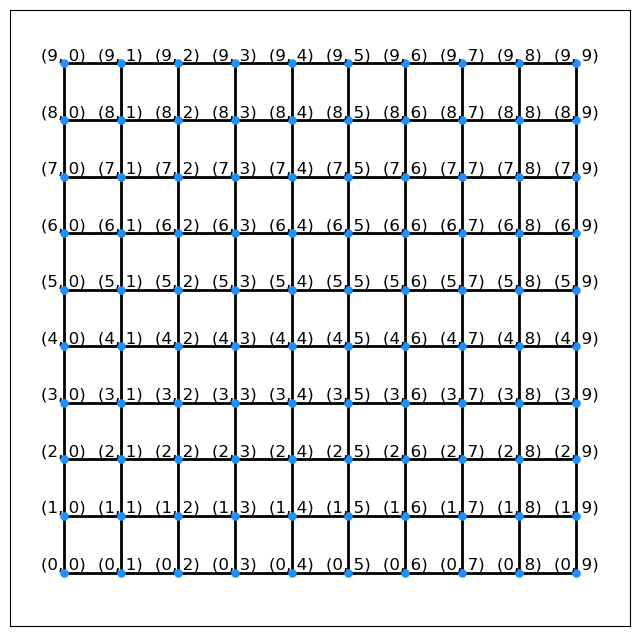

In [186]:
edge_col='k'
node_col='dodgerblue'
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_graph(g, ax=ax, node_color=node_col, edge_color=edge_col,
           node_size=10, with_labels=True, 
           verticalalignment='bottom')

Note that `g` has one node for every pixel in `img` and
`img` has one pixel for every node in `g`.

We draw the array `img` using a color map; this means that each value
in the array specifies the  color of a (rather large) pixel.

Since the values in `img` range from 0 to 2, there are 3 discrete colors values 
in the image.

The color map `cmap plt.cm.Blues` is a white to dark blue color map.

The default coloring behavior is to map 
the minimum value in `img` to the `under` color (white)
and the maximum value in  `img` to the `over` color (dark blue).
This would map 0 to white and 2 to dark blue.

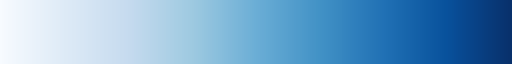

In [322]:
cmap = plt.cm.Blues
cmap

Going from the cmap to the colors (rgba color rep):

In [8]:
# White
cmap(0)

(0.9686274509803922, 0.984313725490196, 1.0, 1.0)

In [27]:
cmap(.5)

(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)

In [127]:
# dark blue
cmap(1.0)

(0.705673158, 0.01555616, 0.150232812, 1.0)

When using the colormap in a plot,
specifying `vmin = -1` shifts the colormap, reserving the value
-1 for white;  0 then maps  to light blue, 1 to a darker
blue, and 2 to the darkest blue.

Here is roughly what goes on under the hood.

In [326]:
from matplotlib import colors
from matplotlib import cm as cmx

# Shifted 
cNorm  = colors.Normalize(vmin=-1, vmax=2)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
# This is white.  Exactly the white cmap maps 0 to.
minColor = scalarMap.to_rgba(-1)
print(minColor, minColor==cmap(0))
# light blue
print(scalarMap.to_rgba(0))

(0.9686274509803922, 0.984313725490196, 1.0, 1.0) True
(0.6718954248366014, 0.8143790849673203, 0.9006535947712418, 1.0)


Displaying our image with a shifted colormap.

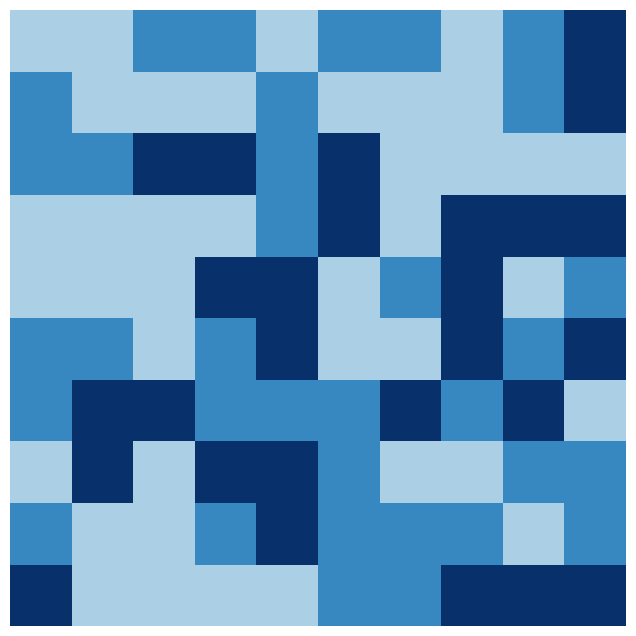

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = plt.cm.Blues

# vmax is taken from max val in img
show_image(img, ax=ax, cmap=cmap, vmin=-1)
#show_image(img, ax=ax, cmap=cmap, vmin=0)

### Showing in group connections

We want to identify the pixels assigned color val 2 (= dark blue)
in the image;  `img == 2` returns a Boolean array with `True`s
corresponding to just those pixels.

Recall that pixels in the 2D image are identified by a pair of
indices, $i$ for the row, $j$ for the column.

So to find the indices for the set of pixels we want,
we use `np.nonzero(img==2)` to return a pair of arrays,
the first containing the $i$-vals, the second  the $j$-vals. 

In [189]:
np.nonzero(img == 2)

(array([0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6,
        7, 7, 7, 8, 9]),
 array([0, 7, 8, 9, 4, 1, 3, 4, 1, 2, 6, 8, 4, 7, 9, 3, 4, 7, 5, 7, 8, 9,
        2, 3, 5, 9, 9]))

Next we select the subgraph containing just the
nodes assigned color val 2 (= dark blue) by the image.

In [292]:
g2 = g.subgraph(zip(*np.nonzero(img == 2)))
g1 = g.subgraph(zip(*np.nonzero(img == 1)))
g0 = g.subgraph(zip(*np.nonzero(img == 0)))

Redraw image and draw the subgraph with just the edges between dark blue nodes.

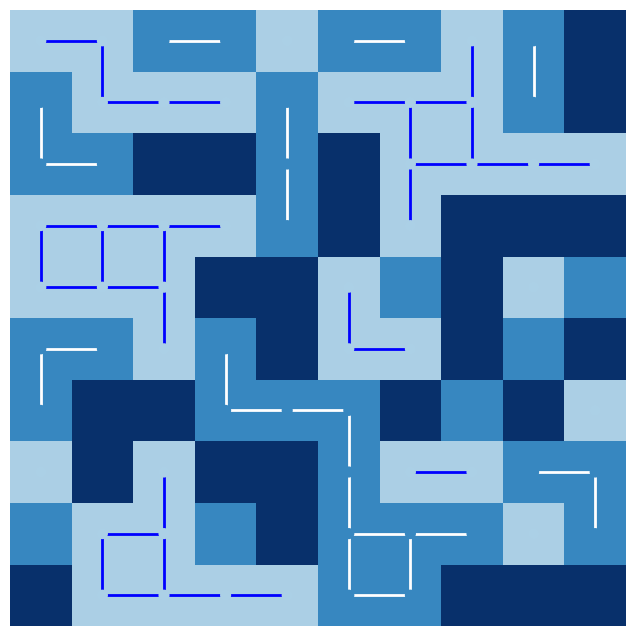

In [323]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img, ax=ax, cmap=cmap, vmin=-1)
ec = cmap(-1)
# Need vmax to get node colors to match background img color
#show_graph(g2, ax=ax, cmap=cmap, edge_color='y', vmin=-1,vmax=2)
show_graph(g1, ax=ax, cmap=cmap, edge_color='w', vmin=-1,vmax=2)
show_graph(g0, ax=ax, cmap=cmap, edge_color='b', vmin=-1,vmax=2)

We redraw connecting just the img==1 nodes:

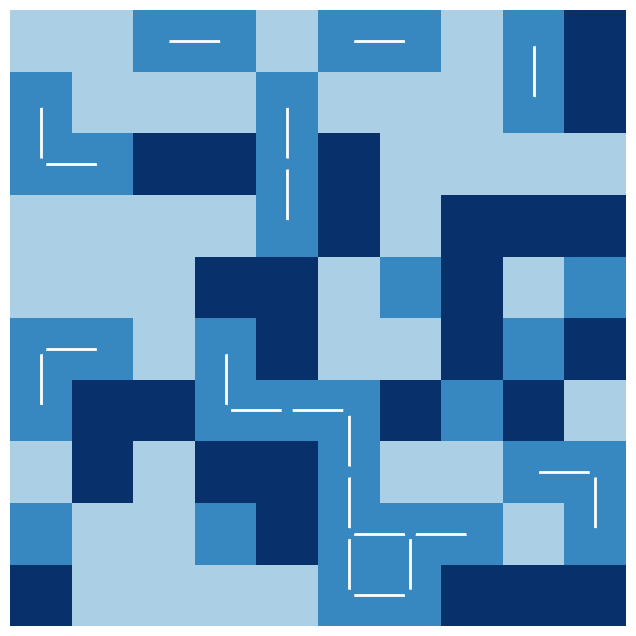

In [191]:
g3 = g.subgraph(zip(*np.nonzero(img == 1)))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img, ax=ax, cmap=cmap, vmin=-1)
show_graph(g3, ax=ax, cmap=cmap, vmin=-1, vmax=2)

Just drawing the `g0` graph, using the same layout.

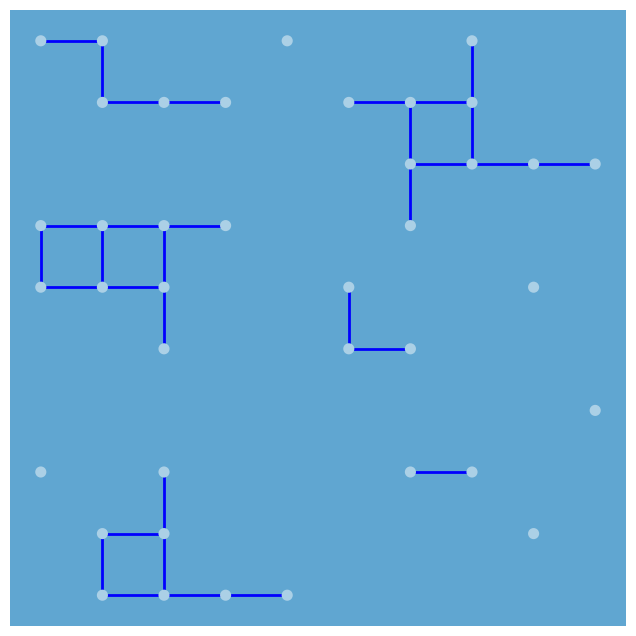

In [312]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
wash=.6
show_image(wash*np.ones((n,n)), ax=ax, cmap=cmap, vmin=-1,vmax=2)
show_graph(g0, ax=ax, cmap=cmap, edge_color='b', vmin=-1,vmax=2)

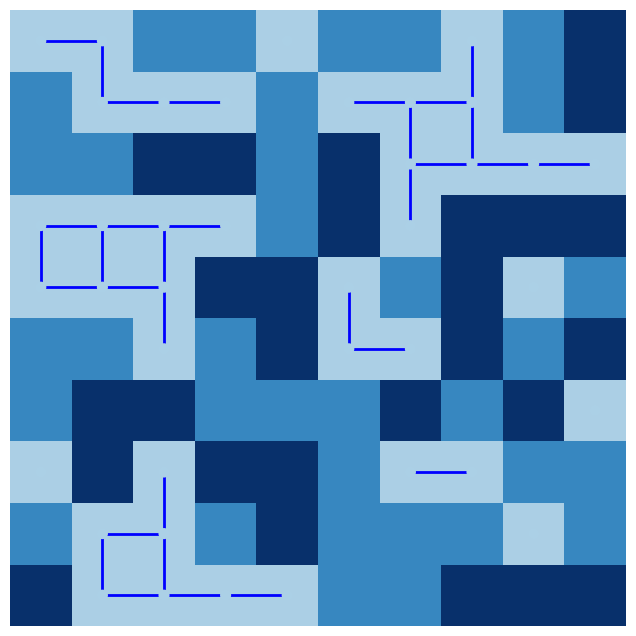

In [318]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img, ax=ax, cmap=cmap, vmin=-1)
show_graph(g0, ax=ax, cmap=cmap, edge_color='b', vmin=-1,vmax=2)
#show_graph(g1, ax=ax, cmap=cmap, edge_color='c', vmin=-1,vmax=2)

## Using colormaps in graph drawing I: Color the connected components of the graph

In [294]:
components = [np.array(list(comp))
              for comp in nx.connected_components(g2)
              if len(comp) >= 3]
len(components)

5

Each component is a array of nodes.  Each node is a 1D array of shape (2,).

In [245]:
components[0]

array([[3, 1],
       [3, 2],
       [2, 1]])

In [246]:
# We copy the image, and assign the same label
# to each of the nodes found in the same component.
img_bis = img.copy()
for i, comp in enumerate(components):
    img_bis[comp[:, 0], comp[:, 1]] = i + 3

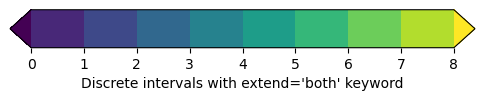

In [339]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

def make_scalar_mappable (cmap,bounds,extend='both'):
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend=extend)
    return mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

def extend_colormap (cmap,bounds):
    sm = make_scalar_mappable (cmap,bounds,extend='both')
    cmap_l =  [sm.to_rgba(bd) for bd in bounds]
    return col.ListedColormap(cmap_l, 'indexed')

bounds=range(9)
#sm = make_extended_scalar_mappable (mpl.cm.Spectral,bounds)
sm = make_scalar_mappable (mpl.cm.viridis,bounds)

fig.colorbar(sm,
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

In [333]:
cmap2 = extend_colormap (mpl.cm.viridis,bounds)#cmap,bounds)

In [265]:
img_bis

array([[2, 0, 0, 0, 0, 1, 1, 6, 6, 6],
       [1, 0, 0, 1, 7, 1, 1, 1, 0, 1],
       [0, 3, 0, 7, 7, 1, 0, 0, 1, 1],
       [1, 3, 3, 1, 1, 1, 2, 1, 2, 0],
       [1, 1, 0, 1, 4, 0, 0, 5, 1, 2],
       [0, 0, 0, 4, 4, 0, 1, 5, 0, 1],
       [0, 0, 0, 0, 1, 2, 0, 5, 5, 5],
       [1, 1, 2, 2, 1, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 2]])

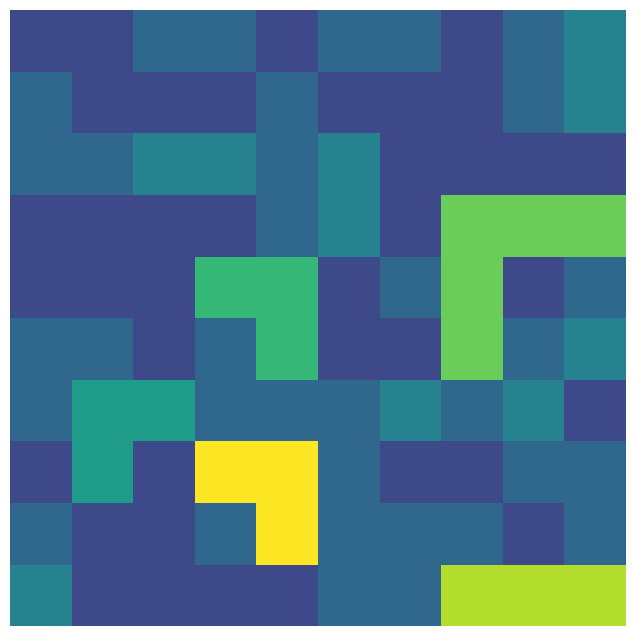

In [334]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img_bis, ax=ax, cmap=cmap2, vmin=-1,vmax=7)

Reusing our previous colormap.

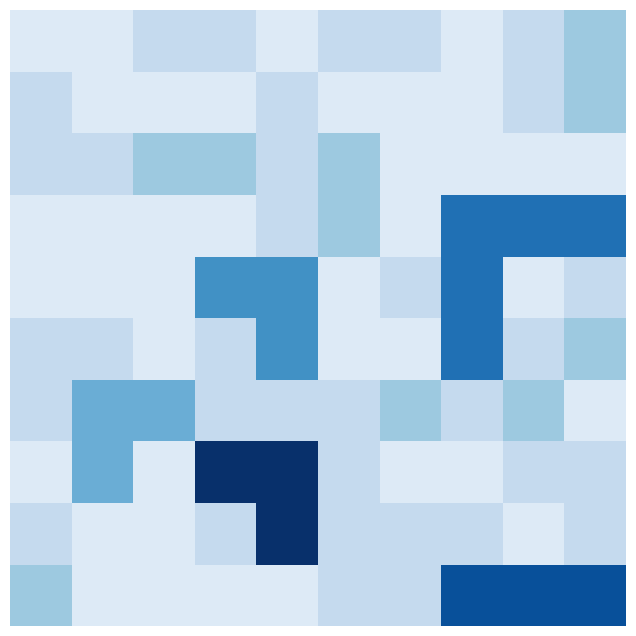

In [267]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_image(img_bis, ax=ax, cmap=cmap,vmin=-1)

## Using colormaps in graph drawing II: Coloring random graph components

In [257]:
rg = nx.erdos_renyi_graph(100,.02,75)
components = [np.array(list(comp))
              for comp in nx.connected_components(rg)
              ]
print(f"There are {len(components)} components")
n2c = {n:i for (i,c) in enumerate(components) for n in c}
colors = [n2c[n] for n in rg]

There are 12 components


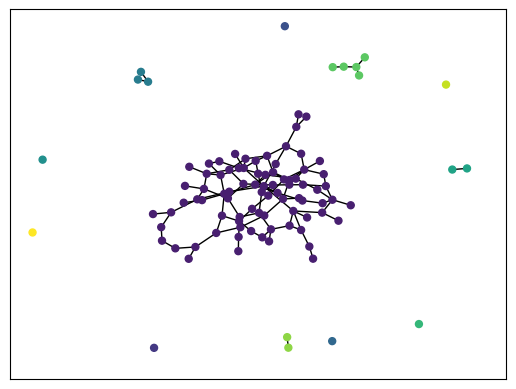

In [276]:
new_cmap = mpl.cm.viridis
ext_new_cmap = extend_colormap (new_cmap,range(12))#cmap,bounds)
layout = nx.fruchterman_reingold_layout(rg,seed=47)
nx.draw_networkx(rg,with_labels=False,node_size=25,
                 cmap=ext_new_cmap,node_color=colors,
                 pos=layout)

## Using colormaps to represent node attributes

Adapted from [Stackoverflow:How to get a colorbar in a networkx drawing.](https://stackoverflow.com/questions/49572089/how-to-get-a-colorbar-in-networkx-draw-networkx)

Let's transform the Karate graph into a pandas `DataFrame`, adding some
centrality info.

In [319]:
import pandas as pd
import networkx as nx    
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
df = pd.DataFrame({'neighbors': {node:list(G.neighbors(node)) for node in G.nodes},
                   'club': {node:data['club'] for node,data in G.nodes(data=True)},
                   'centrality': nx.degree_centrality(G)
                  })


In [198]:
df[13:18]

,neighbors,club,centrality
13,"[0, 1, 2, 3, 33]",Mr. Hi,0.151515
14,"[32, 33]",Officer,0.060606
15,"[32, 33]",Officer,0.060606
16,"[5, 6]",Mr. Hi,0.060606
17,"[0, 1]",Mr. Hi,0.060606


Drawing code.

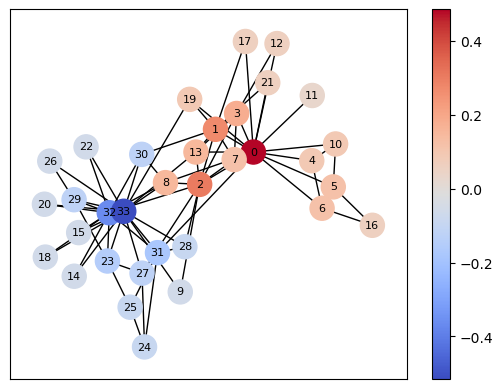

In [340]:
layout = nx.fruchterman_reingold_layout(G,seed=51)

###########################################################
#  C o l o r     P a r a m s
############################################################
# We choose a DIVERGENT color map (neutral central color; intensity
# increases toward both extremes)
cmap = plt.cm.coolwarm
# An alternative divergent map
#cmap= plt.cm.bwr

# We will pass centrality values to the colormap.
colors = df['centrality'].copy()
# We exploit the colormap's divergence
# by assigning the Officer's club nodes negative color vals
colors[df['club']=='Officer'] *= -1
vmin = colors.min()
vmax = colors.max()
###########################################################
#  E n d    C o l o r     P a r a m s
############################################################

nx.draw_networkx(G, pos=layout, with_labels=True, node_color=colors,
                 cmap=cmap, vmin=vmin, vmax=vmax, font_size=8, )

##########  Optional Colorbar key  ##############################################
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm)

In effect two color dimensions, hue and intensity, represent two feature at once, club
membership and centrality.